In [ ]:
# load packages
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.io import arff
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import data
patient_info = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/patient_info.csv', sep = ';')

In [ ]:
patient_info

,ID,SEX,AGE,ACC,ACC_TIME,ACC_DAYS,HRV,HRV_TIME,HRV_HOURS,CPT_II,...,HADS_D,MED,MED_Antidepr,MED_Moodstab,MED_Antipsych,MED_Anxiety_Benzo,MED_Sleep,MED_Analgesics_Opioids,MED_Stimulants,filter_$
0,1,0,3,1,16:00:00,6.0,1,11:00:00,21.0,0,...,2.0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2,0,4,1,10:54:00,6.8,0,NaN,NaN,1,...,7.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,1,2,1,15:28:00,7.2,1,15:25:00,21.0,1,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4,1,3,0,NaN,NaN,1,16:55:00,22.0,1,...,6.0,1,1.0,NaN,NaN,1.0,NaN,1.0,NaN,0
4,5,1,1,1,14:24:00,5.9,1,16:00:00,12.0,1,...,5.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,103,1,4,0,NaN,NaN,1,09:26:00,22.0,1,...,12.0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
99,104,0,2,1,12:08:00,7.3,1,12:00:00,22.0,1,...,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
100,105,1,4,1,12:30:00,6.4,1,13:25:00,13.0,1,...,5.0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1
101,106,0,3,0,NaN,NaN,0,NaN,NaN,1,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
# WURS = Wender Utah Rating Scale - a self-report instrument that is designed to retrospectively evaluate the presence and severity of childhood symptoms of ADHD in adults
# clients with scores of 36 or above have childhood symptoms that are consistent with adults who have an ADHD diagnosis
# ADHD diagnosis: Mean = 58.2 (17.9)
# Normative control: Mean = 17.3 (13.9)

1. WURS: Wender Utah Rating Scale - a self-report instrument that is designed to retrospectively evaluate the presence and severity of childhood symptoms of ADHD in adults clients with scores of 36 or above have childhood symptoms that are consistent with adults who have an ADHD diagnosis

  ADHD diagnosis: Mean = 58.2 (17.9)

  Normative control: Mean = 17.3 (13.9)

2. ASRS: Adult ADHD Self-Report Scale
3. MADRS: The Montgomery–Åsberg Depression Rating Scale (MADRS) is a widely used clinician‐rated measure of depressive severity
4. HADS_A/HADS_D: Hospital Anxiety and Depression Scale

5. CPT_II: Conners’ Continuous Performance Test II (CPT II)

Text(43.25, 0.5, 'Conditions')

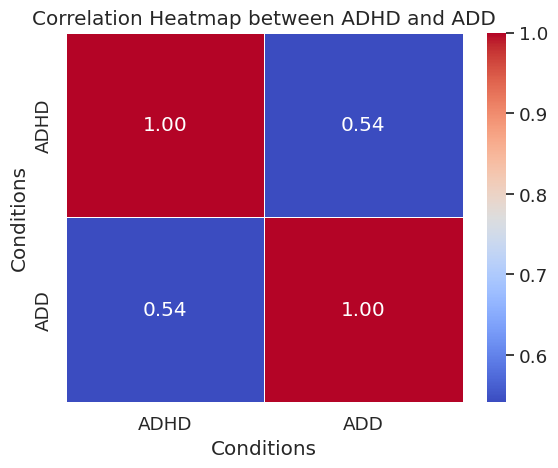

In [ ]:
correlation_matrix = patient_info[['ADHD', 'ADD']].corr()

sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap between ADHD and ADD")
plt.xlabel("Conditions")
plt.ylabel("Conditions")

In [ ]:
# correlation coefficients

print(patient_info['ADHD'].corr(patient_info['WURS']))
print(patient_info['ADHD'].corr(patient_info['ASRS']))
print(patient_info['ADHD'].corr(patient_info['MADRS']))
print(patient_info['ADHD'].corr(patient_info['HADS_A']))
print(patient_info['ADHD'].corr(patient_info['HADS_D']))
print(patient_info['ADHD'].corr(patient_info['CPT_II']))
print(patient_info['ADHD'].corr(patient_info['HRV']))
print(patient_info['ADHD'].corr(patient_info['HRV_HOURS']))

0.5692267548151655
0.5329854518773154
-0.07410594374547483
-0.004984138298598418
-0.16998599561957323
0.09855689686340698
-0.07514713309611194
-0.07041427089041939


In [ ]:
patient_info_filtered = patient_info[['ADHD', 'WURS', 'ASRS', 'MADRS', 'HADS_A', 'HADS_D', 'BIPOLAR']]
patient_info_filtered.shape

(103, 7)

In [ ]:
# changing data types
patient_info_filtered['WURS'] = pd.to_numeric(patient_info_filtered['WURS'],errors = 'coerce')
patient_info_filtered['ASRS'] = pd.to_numeric(patient_info_filtered['ASRS'],errors = 'coerce')
patient_info_filtered['MADRS'] = pd.to_numeric(patient_info_filtered['MADRS'],errors = 'coerce')
patient_info_filtered['HADS_A'] = pd.to_numeric(patient_info_filtered['HADS_A'],errors = 'coerce')
patient_info_filtered['HADS_D'] = pd.to_numeric(patient_info_filtered['HADS_D'],errors = 'coerce')


<ipython-input-8-37f8064e2ef0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_info_filtered['WURS'] = pd.to_numeric(patient_info_filtered['WURS'],errors = 'coerce')
<ipython-input-8-37f8064e2ef0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_info_filtered['ASRS'] = pd.to_numeric(patient_info_filtered['ASRS'],errors = 'coerce')
<ipython-input-8-37f8064e2ef0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [ ]:
# fillna
def replace_missing_with_median(df, columns):
    for s in columns:
        median = df[s].median()
        df[s].fillna(median, inplace=True)
    return df
# Call the function to replace missing values with the median
columns = ['WURS', 'ASRS', 'MADRS', 'HADS_A', 'HADS_D']
replace_missing_with_median(patient_info_filtered, columns)

<ipython-input-10-da4d438e111a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[s].fillna(median, inplace=True)
<ipython-input-10-da4d438e111a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[s].fillna(median, inplace=True)
<ipython-input-10-da4d438e111a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[s].fillna(median, inplace=True)
<ipython-input-10-da4d438e111a>:5: SettingWithCopyWarning: 
A value is trying to be set on 

,ADHD,WURS,ASRS,MADRS,HADS_A,HADS_D,BIPOLAR
0,1,54.0,53.0,26.0,12.0,2.0,1
1,1,83.0,62.0,11.0,2.0,7.0,0
2,1,72.0,60.0,6.0,8.0,0.0,1
3,1,82.0,46.0,19.0,12.0,6.0,1
4,1,60.0,56.0,28.0,10.0,5.0,1
...,...,...,...,...,...,...,...
98,0,49.0,48.0,22.0,15.0,12.0,0
99,0,32.0,49.0,10.0,8.0,2.0,1
100,0,35.0,22.0,20.0,9.0,5.0,0
101,0,54.0,50.0,13.0,10.0,5.0,1


In [ ]:
# subset data
X = patient_info_filtered.loc[:, ['WURS', 'ASRS', 'MADRS', 'HADS_A', 'HADS_D', 'BIPOLAR']]
Y = patient_info_filtered.loc[:, "ADHD"]

In [ ]:
# split into train & test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(82, 6) (82,)
(21, 6) (21,)


In [ ]:
# Build a random forest Classifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

clf.fit(X_train, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

RandomForestClassifier(max_features='auto', n_estimators=10, n_jobs=2,
                       random_state=0)

In [ ]:
# make predictions
predictions = clf.predict(X_test)
predictions

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0])

In [ ]:
# check accuracy
pd.crosstab(y_test, predictions, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,9,1
1,2,9


In [ ]:
# root mean squared error
np.sqrt(np.mean(y_test - predictions)**2)

0.047619047619047616

In [ ]:
importance_df = pd.DataFrame(list(zip(X_train, clf.feature_importances_)))
importance_df

,0,1
0,WURS,0.283753
1,ASRS,0.286708
2,MADRS,0.144138
3,HADS_A,0.122917
4,HADS_D,0.115484
5,BIPOLAR,0.047000


<BarContainer object of 6 artists>

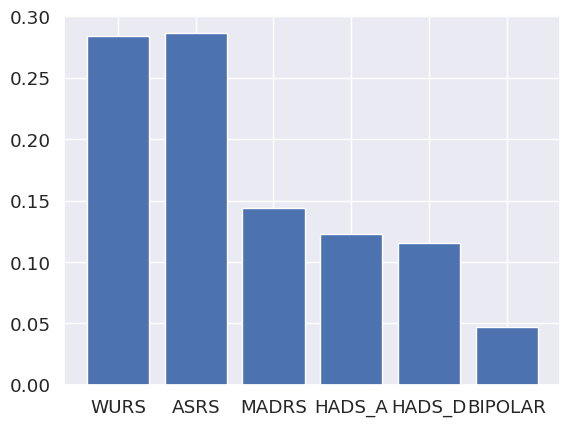

In [ ]:
plt.bar(importance_df[0], importance_df[1])

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
        fit_intercept=True,
        penalty='l2')

lr.fit(X_train, y_train)
lr.intercept_, lr.coef_

(array([-3.49386834]),
 array([[ 0.07363172,  0.04996024,  0.04911158, -0.08261444, -0.21223242,
         -0.98020952]]))

In [ ]:
lr.predict(X_train)

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1])

In [ ]:
# the following code is for calculating performance metrics

train_accuracy = sum(lr.predict(X_train) == y_train) / len(X_train)
test_accuracy = sum(lr.predict(X_test) == y_test) / len(X_test)

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Y_test_pred = lr.predict(X_test)

precision = sum((y_test == Y_test_pred) & (Y_test_pred == 1)) / sum(Y_test_pred)
recall = sum((y_test == Y_test_pred) & (Y_test_pred == 1)) / sum(y_test)

print(f'precision = {precision:.4f}')
print(f'recall = {recall:.4f}')

Train accuracy: 0.7683
Test accuracy: 0.9048
precision = 1.0000
recall = 0.8182


In [ ]:
# visualize confusion matrix

from sklearn.metrics import confusion_matrix

Y_test_pred = lr.predict(X_test)
cnf_matrix = confusion_matrix(y_test, Y_test_pred)
cnf_matrix

array([[10,  0],
       [ 2,  9]])

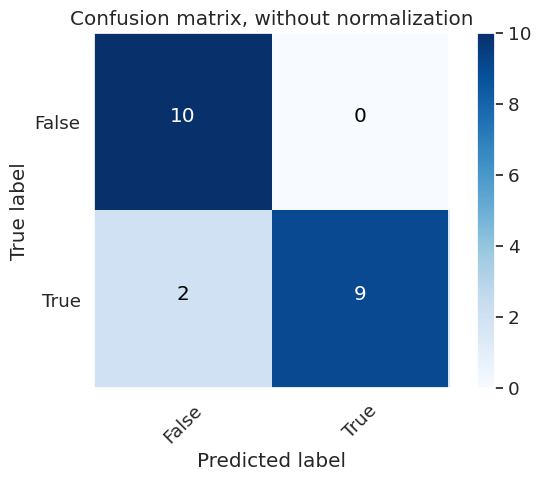

In [ ]:
# borrowed from data 100

# Run this cell to plot the confusion matrix; no further action is needed.

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    import itertools

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid(False)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, np.round(cm[i, j], 2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = ['False', 'True']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

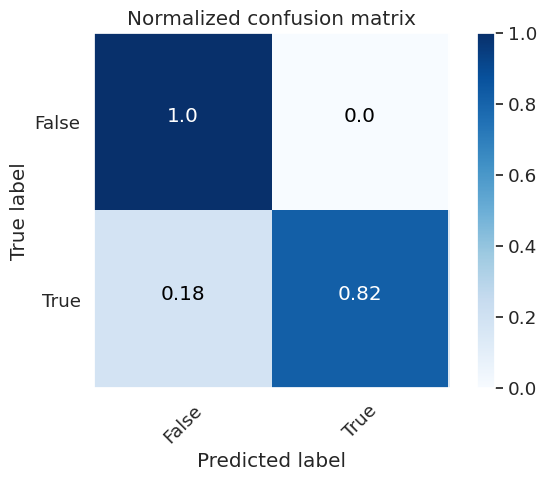

In [ ]:
cnf_matrix_norm = cnf_matrix / np.sum(cnf_matrix, axis = 1)[:, np.newaxis]

# Do not modify below this line.
plot_confusion_matrix(cnf_matrix_norm, classes=class_names,
                       title='Normalized confusion matrix')